<h2> Importing libraries </h2>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

<h2> Data collection and analysis </h2>

In [4]:
dataset = pd.read_csv('insurance.csv')

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

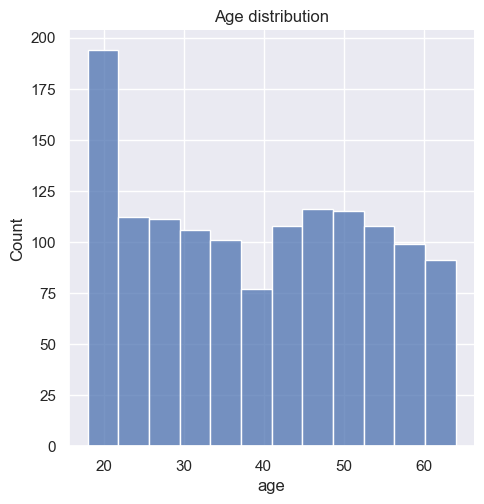

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['age'])
plt.title('Age distribution')
plt.show()

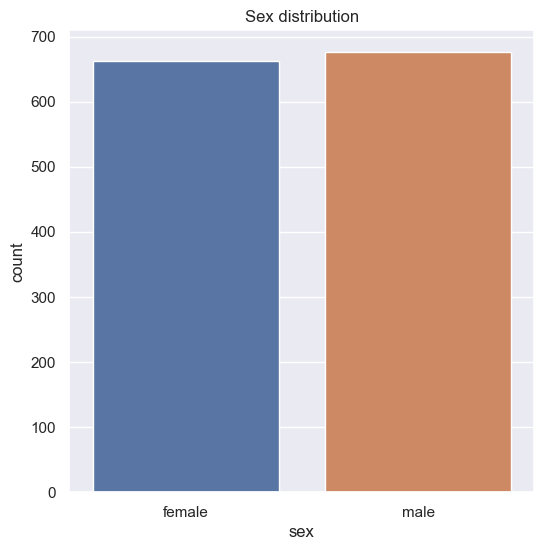

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=dataset)
plt.title('Sex distribution')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

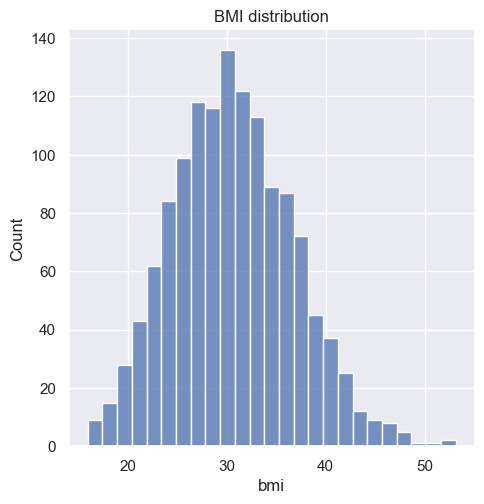

In [13]:
plt.figure(figsize=(6,6))
sns.displot(dataset['bmi'])
plt.title('BMI distribution')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

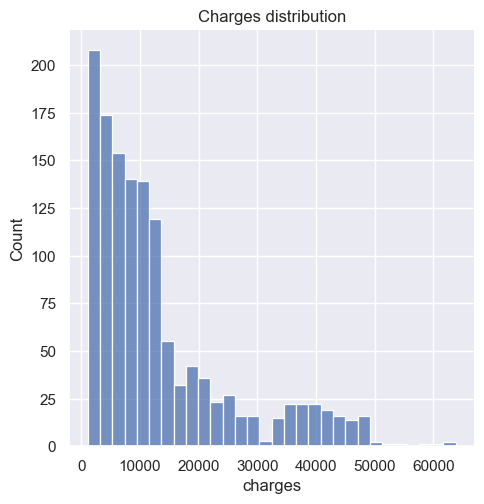

In [14]:
plt.figure(figsize=(6,6))
sns.displot(dataset['charges'])
plt.title('Charges distribution')
plt.show()

<h2> Data Preprocessing </h2>

In [15]:
dataset.replace({'sex':{'male':1, 'female':0}, 'smoker':{'yes':1, 'no':0}, 'region':{'northeast':0, 'northwest':1, 'southeast':2, 'southwest':3}}, inplace=True)

<h4> Splitting features and target </h4>

In [16]:
X = dataset.drop(columns='charges', axis=1)
y = dataset['charges']

<h4> Standardistaion </h4>

In [17]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

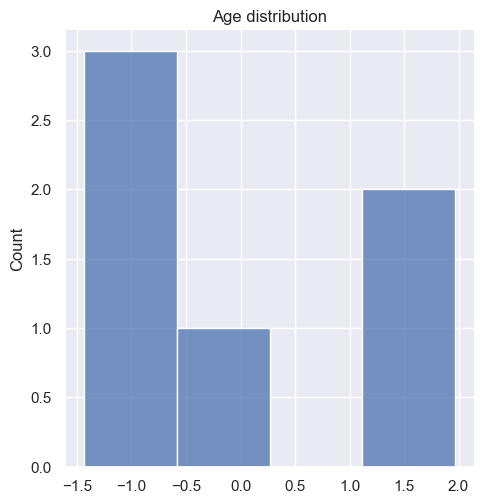

In [18]:
plt.figure(figsize=(6,6))
sns.displot(X[0])
plt.title('Age distribution')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

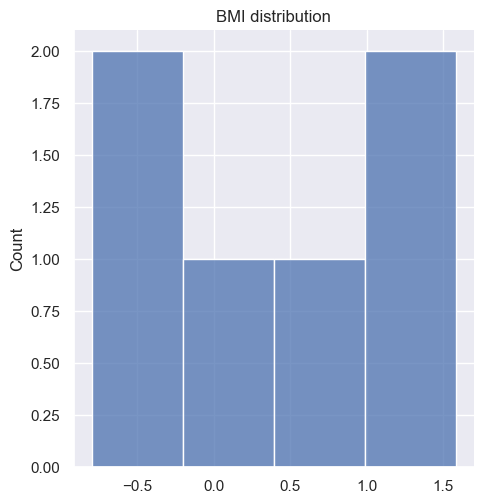

In [19]:
plt.figure(figsize=(6,6))
sns.displot(X[2])
plt.title('BMI distribution')
plt.show()

Train Test Split

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, Xtrain.shape, Xtest.shape)

(1338, 6) (1070, 6) (268, 6)


<h2> Model Training </h2>

In [22]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

<h2> Model Evaluation </h2>

In [23]:
trainPrediction = model.predict(Xtrain)
trainAccuracy = metrics.r2_score(ytrain, trainPrediction)
print(trainAccuracy)

0.7519923667088932


In [24]:
testPrediction = model.predict(Xtest)
testAccuracy = metrics.r2_score(ytest, testPrediction)
print(testAccuracy)

0.7445422986536504


<h2> Prediction </h2>

In [26]:
input = (23,0,28.31,0,1,1)
stdInput = scalar.transform(np.asarray(input).reshape(1, -1))
print("Charges: ", model.predict(stdInput))

Charges:  [26980.16239415]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
